# Paper Figure 6: Quantification



In [1]:
import os
from test_files import get_files, prepare_test

tmp_folder = os.path.join(os.getcwd(),'temp/')
test_folder = 'fig6'

In [2]:
files = []
get_files(tmp_folder, files)
prepare_test(files, tmp_folder, test_folder)

Creating dir F:\alphapept\sandbox\temp/fig6.


In [3]:
evidence_path = 'F:/alphapept/external_test_files/PXD006109/evidence.txt'
protein_group_path = 'F:/alphapept/external_test_files/PXD006109/proteinGroups.txt'

In [4]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd
import numpy as np

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')

ref = ref.replace(0, np.nan)

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (52,53,61) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body,

In [5]:
df_= ref.copy()
ds = [_ for _ in df_.columns if 'LFQ intensity' in _]
base_columns = [_ for _ in ds if '02' in _]
ratio_columns = [_ for _ in ds if '12' in _]
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_mq = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [6]:
lookup_dict = dict(zip(ref['Protein IDs'].values, ref['Species'].values))

In [7]:
import numpy as np
df_ = pt.copy()
df_['Species'] = [lookup_dict[_] for _ in df_.index]

ds = [_ for _ in df_.columns if 'LFQ' in _]
base_columns = [_ for _ in ds if 'HeLa2' in _]
ratio_columns = [_ for _ in ds if 'HeLa12' in _]   
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_ap = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [8]:
def get_species(valid):

    homo = valid[valid['Species'] == 'Homo sapiens']
    e_coli = valid[valid['Species'] == 'Escherichia coli']
    
    return homo, e_coli

In [9]:
homo_mq, e_coli_mq = get_species(valid_mq)
homo_ap, e_coli_ap = get_species(valid_ap)

Homo 0.32
Ecoli 0.65


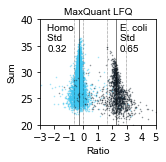

In [14]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

hfont = {'fontname':'Arial', 'size':10}

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_mq['ratio_'], homo_mq['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_mq['ratio_'], e_coli_mq['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_mq['ratio_'].mean()
std_ = homo_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Homo {std_:.2f}')
plt.text(-2.5, 34, f'Homo \nStd \n{std_:.2f}', **hfont)

mean_ = e_coli_mq['ratio_'].mean()
std_ = e_coli_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 34, f'E. coli \nStd \n{std_:.2f}', **hfont)

plt.xlim([-3, 5])
plt.ylim([20, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('MaxQuant LFQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_mq.pdf')
plt.show()

Std 0.31
Ecoli 0.53


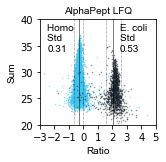

In [15]:
plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_ap['ratio_'], homo_ap['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_ap['ratio_'], e_coli_ap['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_ap['ratio_'].mean()
std_ = homo_ap['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

plt.text(-2.5, 34, f'Homo \nStd \n{std_:.2f}', **hfont)

print(f'Std {std_:.2f}')

mean_ = e_coli_ap['ratio_'].mean()
std_ = e_coli_ap['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 34, f'E. coli \nStd \n{std_:.2f}', **hfont)


plt.xlim([-3, 5])
plt.ylim([20, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('AlphaPept LFQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_ap.pdf')
plt.show()

In [ ]:
import alphapept.quantification
from tqdm import tqdm as tqdm
import numpy as np
import pandas as pd

from itertools import combinations
from numba.typed import List
from time import time
from tqdm import tqdm

import alphapept.quantification

n_samples = 20

column_combinations = List()
[column_combinations.append(_) for _ in combinations(range(n_samples), 2)]



results = []
for run in tqdm(range(200)):
    for n_sequences in range(2,20):
    
        signal, sample, ground_truth = alphapept.quantification.generate_dummy_data(n_sequences, n_samples)
        ratios = alphapept.quantification.get_protein_ratios(signal.values, column_combinations)

        for method in ['L-BFGS-B', 'SLSQP', 'Powell','trf']:
            error = False
            start = time()
            
            try:
                solution, success = alphapept.quantification.solve_profile(ratios, method)
                
                if not success:
                    solution = np.zeros(ratios.shape[0])
            except Exception as e:
                print(e)
                error = True
                solution = np.zeros(ratios.shape[0])
               
            mape = np.mean(np.abs((solution-ground_truth)/ground_truth))
                    
            end = time()

            time_elapsed_s = (end-start)

            results.append((method, time_elapsed_s, mape, error, success, n_sequences, run))
    
result_df = pd.DataFrame(results, columns=['Method', 'Time Elapsed (s)', 'Mean absolute percentage error', 'Errors', 'Success', 'Sequences', 'Run'])


In [ ]:
result_df['Error relative to mean'] = result_df['Mean absolute percentage error'] / result_df.groupby(['Sequences','Run'])['Mean absolute percentage error'].transform(np.mean)
result_df_ = result_df[result_df["Success"]]

grouped_mean = result_df_.groupby(['Method']).mean().reset_index()

grouped_std = result_df_.groupby(['Method']).std().reset_index()
grouped_cnt = result_df_.groupby(['Method']).count().reset_index()

In [ ]:
dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

colors = [light_blue, teal, green, yellow]

hfont = {'fontname':'Arial', 'size':10}
plt.figure(figsize=(2.363,2.363)) #60x60

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(2.363*3,2.363))

ax1.barh(grouped_mean['Method'], grouped_mean['Time Elapsed (s)'], color = colors)

ax1.set_xlabel('Time (s)', **hfont)

ax2.barh(grouped_mean['Method'], grouped_mean['Error relative to mean'], xerr = grouped_std['Error relative to mean'].values, color = colors)

ax2.set_xlabel('Error to mean', **hfont)

ax3.barh(grouped_mean['Method'], grouped_cnt['Success']/max(grouped_cnt['Success']), color = colors)

ax3.set_xlabel('Success', **hfont)

ax2.set_yticks([])
ax3.set_yticks([])
#plt.suptitle('Optimizer comparison', **hfont)

plt.tight_layout()
plt.savefig('figures/06_comparsion.pdf')
plt.show()


In [ ]:
grouped_mean.iloc[3]['Time Elapsed (s)'] / grouped_mean.iloc[2]['Time Elapsed (s)']

In [ ]:
grouped_cnt['Success']/max(grouped_cnt['Success'])

In [ ]:
grouped_mean